<a href="https://colab.research.google.com/github/akshatshah91/Game-AI/blob/master/gym_into.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym

In [2]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 2s (264 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...


In [3]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.6 [783 kB]
Fetched 783 kB in 2s (378 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 147031 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.6_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.6) ...
Setting up xvfb (2:1.19.6-1ubuntu4.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
!pip install pyvirtualdisplay

In [5]:
#!pip install pyglet==v1.3.2

In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1


**OpenAI Gym**

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:


Observation space: Box(4,)
Action space: Discrete(2)


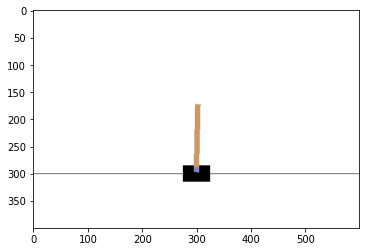

In [22]:
import gym
env = gym.make("CartPole-v1")


env.reset()
#env.render('rgb_array')
plt.imshow(env.render('rgb_array'))


print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

reset() - reset environment to initial state, return first observation

render() - show current environment state (a more colorful version :) )

step(a) - commit action a and return (new observation, reward, is done, info)


In [23]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.01165405  0.0467165   0.0031386   0.03087485]


In [27]:
print("taking action 1 (right)")
new_obs, reward, is_done, _ = env.step(1)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 1 (right)
new observation code: [ 0.01549345  0.8272942  -0.02941556 -1.14204405]
reward: 1.0
is game over?: False


# Time to play

Try tweaking t or action strategy

**Remember**: Target is to reach to flag

In [1]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.CartPoleEnv(), max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
reward = 0
actions = {'left': 0, 'right': 1,}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(s):
    if s[3] < 0:
        return actions['right']
    else:
        return actions['left']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    s, r, done, _ = env.step(policy(s))
    reward += r
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!", t)
        break
else:    
    print("Time limit exceeded. Try again.")

NameError: ignored

In [14]:
plt.show()